## 1 Задача
Постройте график

Назовите график

Сделайте именование оси x и оси y

Сделайте выводы

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### 1.1. Загрузить данные

In [18]:
df = pd.read_csv('kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


### 1.2 Изучите стоимости недвижимости

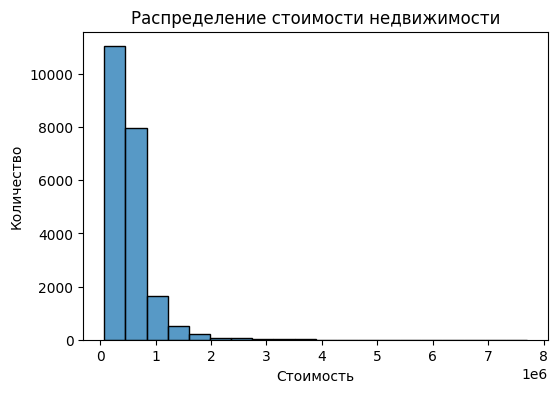

In [19]:
plt.figure(figsize=(6, 4))
sns.histplot(df['price'], bins=20)
plt.title('Распределение стоимости недвижимости')
plt.xlabel('Стоимость')
plt.ylabel('Количество');

### 1.3 Изучите распределение квадратуры жилой

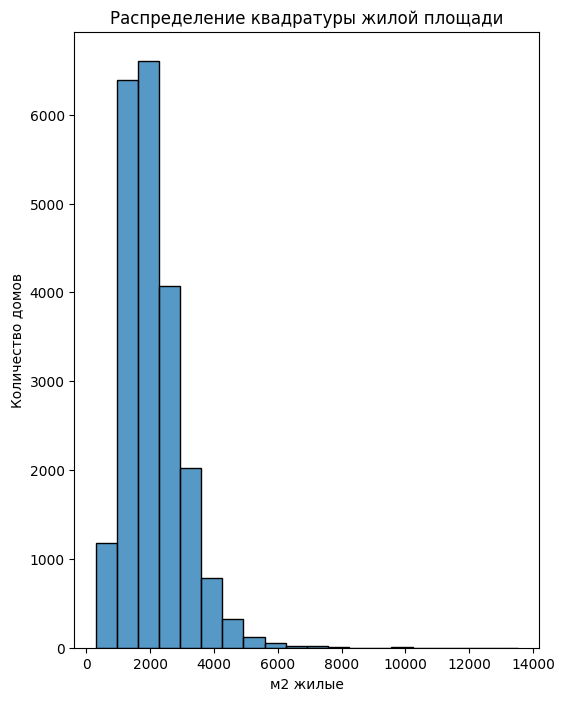

In [20]:
plt.figure(figsize=(6, 8))
sns.histplot(df['sqft_living'], bins=20)
plt.title('Распределение квадратуры жилой площади')
plt.xlabel('м2 жилые')
plt.ylabel('Количество домов');

### 1.4 Изучите распределение года постройки

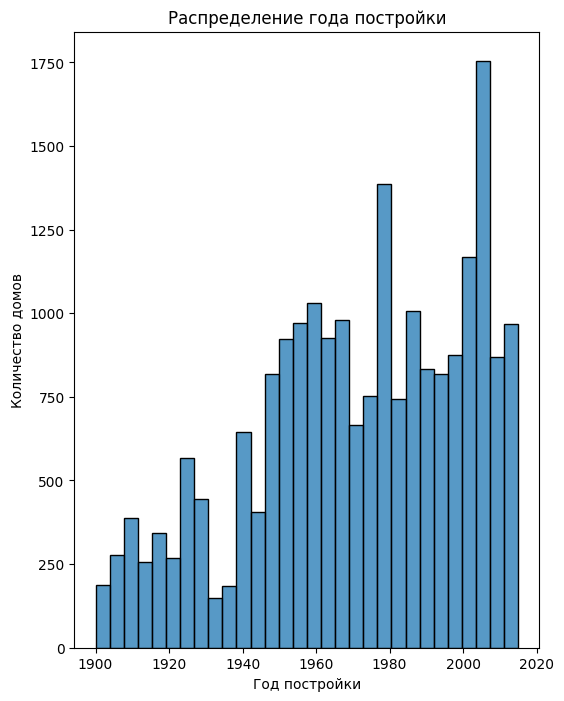

In [21]:
plt.figure(figsize=(6, 8))
sns.histplot(df['yr_built'], bins=30)
plt.title('Распределение года постройки')
plt.xlabel('Год постройки')
plt.ylabel('Количество домов');

## 2 Задача

### 2.1 Изучите распределение домов от наличия вида на набережную
Постройте график

Сделайте выводы

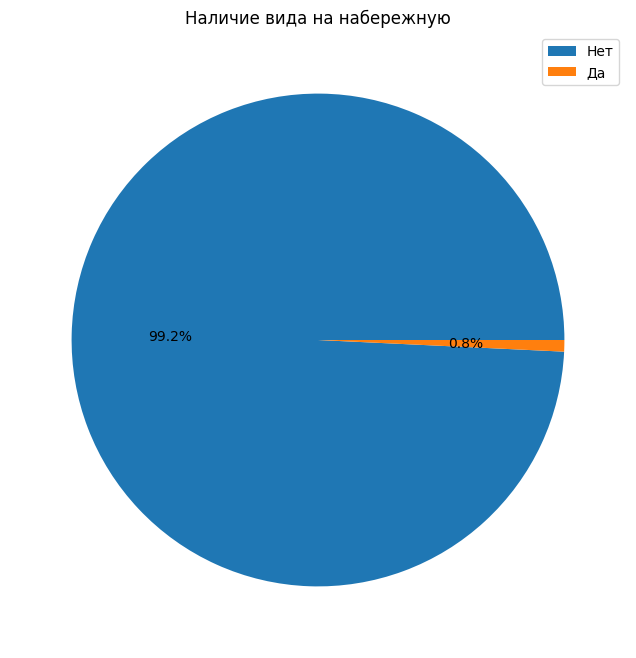

In [22]:
data = df['waterfront'].value_counts()

plt.figure(figsize=(10, 8))
plt.pie(data, autopct='%1.1f%%')
plt.legend(['Нет', 'Да']);
plt.title('Наличие вида на набережную');

### 2.2 Изучите распределение этажей домов

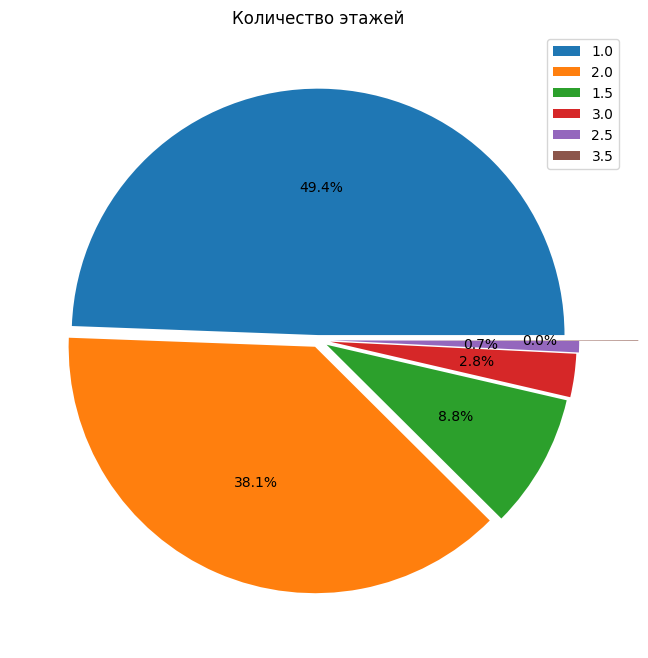

In [23]:
data = df['floors'].value_counts()

plt.figure(figsize=(10, 8))
expl = [0.02, 0.03, 0.04, 0.05, 0.06, 0.3]
plt.pie(data, autopct='%1.1f%%', explode=expl)
plt.title('Количество этажей')
plt.legend(data.index);

### 2.3 Изучите распределение состояния домов

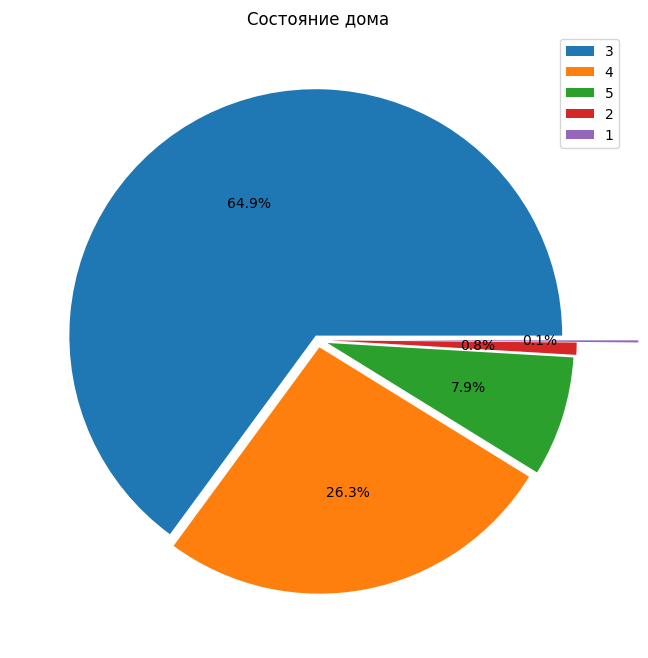

In [24]:
data = df['condition'].value_counts()

plt.figure(figsize=(10, 8))
expl = [0.02, 0.03, 0.04, 0.05, 0.3]
plt.pie(data, autopct='%1.1f%%', explode=expl)
plt.title('Состояние дома')
plt.legend(data.index);

## 3 задача
Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.
Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

In [25]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix = np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0
corr_matrix

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
price,0.0,1.0,0.3,0.5,0.7,0.0,0.3,0.3,0.4,0.0,0.7,0.6,0.3,0.0,0.0,0.0,0.3,0.0,0.6,0.0
bedrooms,0.0,0.3,1.0,0.5,0.6,0.0,0.0,0.0,0.0,0.0,0.4,0.5,0.3,0.0,0.0,0.0,0.0,0.0,0.4,0.0
bathrooms,0.0,0.5,0.5,1.0,0.8,0.0,0.5,0.0,0.0,0.0,0.7,0.7,0.3,0.5,0.0,0.0,0.0,0.0,0.6,0.0
sqft_living,0.0,0.7,0.6,0.8,1.0,0.0,0.4,0.0,0.3,0.0,0.8,0.9,0.4,0.3,0.0,0.0,0.0,0.0,0.8,0.0
sqft_lot,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7
floors,0.0,0.3,0.0,0.5,0.4,0.0,1.0,0.0,0.0,-0.3,0.5,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.3,0.0
waterfront,0.0,0.3,0.0,0.0,0.0,0.0,0.0,1.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
view,0.0,0.4,0.0,0.0,0.3,0.0,0.0,0.4,1.0,0.0,0.3,0.0,0.3,0.0,0.0,0.0,0.0,0.0,0.3,0.0
condition,0.0,0.0,0.0,0.0,0.0,0.0,-0.3,0.0,0.0,1.0,0.0,0.0,0.0,-0.4,0.0,0.0,0.0,0.0,0.0,0.0


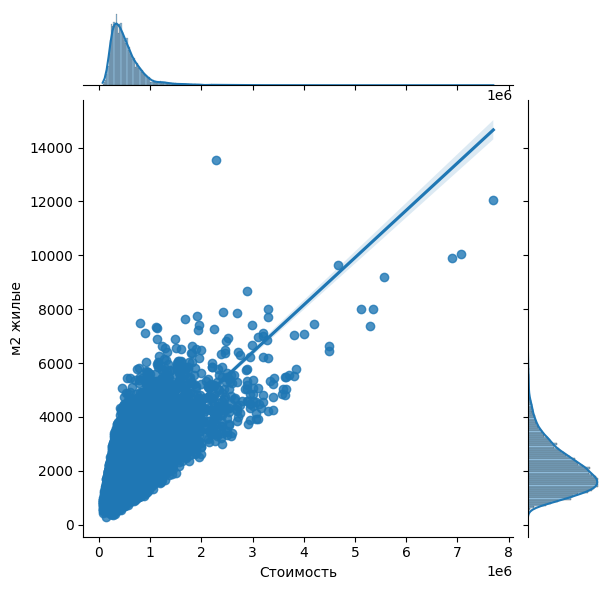

In [26]:
sns.jointplot(x=df['price'], y=df['sqft_living'], kind='reg')
plt.xlabel('Стоимость')
plt.ylabel('м2 жилые');


```
Чем больше жилплощадь дома, тем выше его стоимость

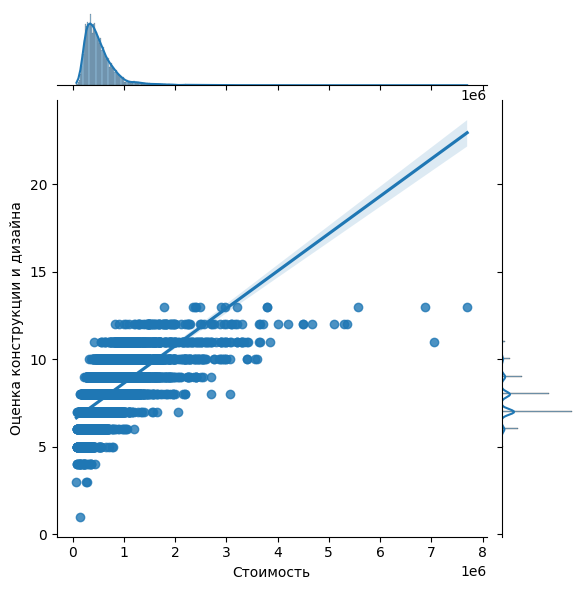

In [27]:
sns.jointplot(x=df['price'], y=df['grade'], kind='reg')
plt.xlabel('Стоимость')
plt.ylabel('Оценка конструкции и дизайна');


````
Чем выше качество конструкции и дизайна дома, тем выше его стоимость

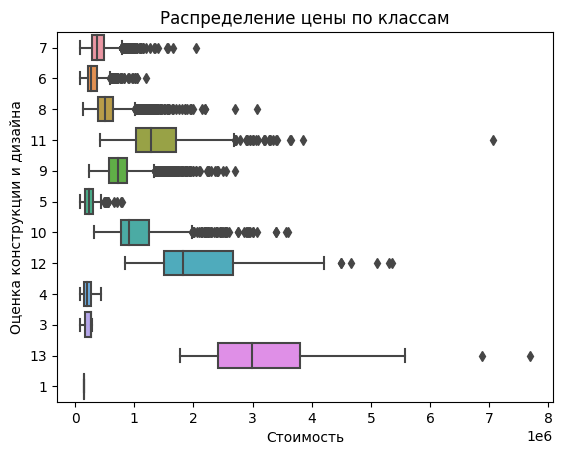

In [28]:
sns.boxplot(x=df['price'], y=df['grade'].astype('str'), whis=1.5);
plt.xlabel('Стоимость')
plt.ylabel('Оценка конструкции и дизайна')
plt.title('Распределение цены по классам');

~~~~
Наибольшую стоимость имеют дома с оценкой конструкции и дизайна 13

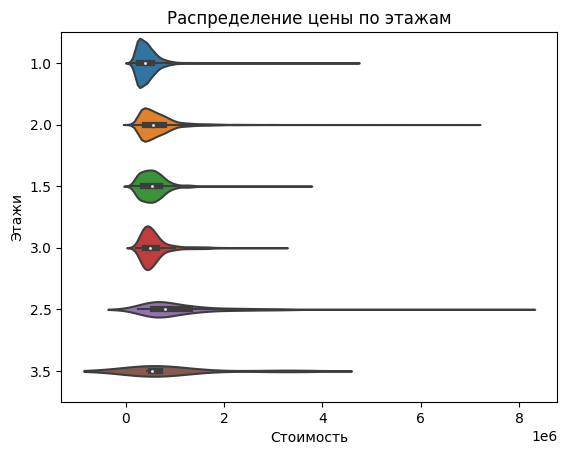

In [29]:
sns.violinplot(x=df['price'], y=df['floors'].astype('str'), whis=1.5);
plt.xlabel('Стоимость')
plt.ylabel('Этажи')
plt.title('Распределение цены по этажам');

````
Наибольшую стоимость имеют дома с количеством этажей 2,5

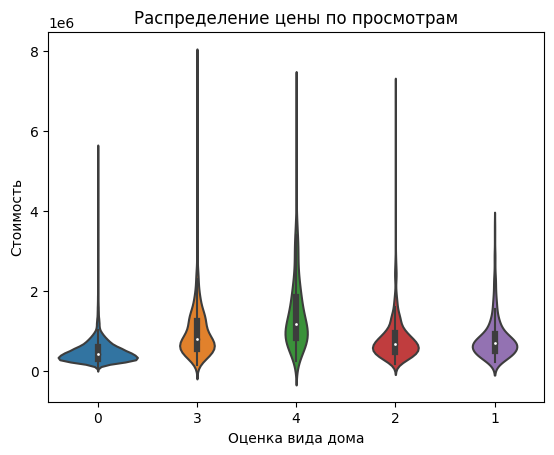

In [30]:
sns.violinplot(x=df['view'].astype('str'), y=df['price'], whis=1.5);
plt.xlabel('Оценка вида дома')
plt.ylabel('Стоимость')
plt.title('Распределение цены по просмотрам');

``` 
Наибольшую стоимость имеют дома с оценкой вида 4